[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farheenfab/AppliedText_CW/blob/main/CW1-analyze_dataset.ipynb)

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [2]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import nltk
import spacy


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [3]:
# get file from disk
filename = 'final_comments_df.csv'
final_comments_df=pd.read_csv(filename)

In [4]:
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgxWJ86QFbnxB-Oz0EF4AaABAg,NaN,baPBapBaM,2021-12-24T10:09:35Z,2021-12-24T10:09:35Z,67514,he actually admitted that he fell for her but ...
1,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,Ugyk65Vr1FOCmveq6oB4AaABAg,NaN,sAkUrA6309,2021-12-20T03:03:14Z,2021-12-20T03:03:59Z,47747,"usually in any drama especially romcom, actors..."
2,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgyswTPxdPEkWuYepK94AaABAg,NaN,paulina9134,2021-12-21T22:40:15Z,2021-12-21T22:40:15Z,35975,She: living a real kdrama moment while acting ...
3,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgxCZ2y-BBBoISQWEvl4AaABAg,NaN,jungnikahoseok,2021-12-22T17:31:08Z,2021-12-22T17:32:45Z,20616,This hits different when you know the fact tha...
4,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgzOIIA-v4FwrlcFBnt4AaABAg,NaN,raraminaj1251,2022-04-30T13:05:56Z,2022-04-30T13:05:56Z,19679,He fell for her she rejected him and when he w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Strong Girl Nam-soon,behind the scenes of strong woman do bong soon...,3CW87x2bji0,thatkdramaholic,2022-02-17T16:05:16Z,NaN,https://i.ytimg.com/vi/3CW87x2bji0/default.jpg,Ugz9g_hacswZHJeRpyl4AaABAg,NaN,ThatsMeRajvi...,2023-01-06T14:04:44Z,2023-01-06T14:04:44Z,20,Ok now i got the vibe why he is V's friend
196,Strong Girl Nam-soon,Girl Attitude Status 🔥 Ft.Little Mix - Power ✨...,qohGpbw5t2E,aspro editz,2023-10-14T00:30:33Z,shorts.,https://i.ytimg.com/vi/qohGpbw5t2E/default.jpg,Ugz-mMm9y6q6ZzCJ7ll4AaABAg,NaN,Shyshy_9411,2024-01-18T17:39:51Z,2024-01-18T17:39:51Z,19,This girl l show in all of us are dead
197,Strong Girl Nam-soon,Eun-ji transformation 😨 into zombie 🧟‍♀ All of...,WoXt1vxnE1k,its Blue Drama 💙,2023-06-28T11:23:30Z,Eun-ji transformation into zombie ‍♀ All of us...,https://i.ytimg.com/vi/WoXt1vxnE1k/default.jpg,UgwhsqAUaU2PbLZI8X94AaABAg,NaN,user-lo1bp7pe1i,2023-07-03T05:37:28Z,2023-07-03T05:37:28Z,19,Name the film:All of us are dead is very cool
198,Strong Girl Nam-soon,SHE SAVED HER LIFE ❤️ #Shorts,aNV59aHbM0o,Goubtube,2021-07-19T19:00:00Z,SUBSCRIBE FOR MORE! --------------------------...,https://i.ytimg.com/vi/aNV59aHbM0o/default.jpg,UgwJysTTGDp5bLzMrSF4AaABAg,NaN,jeremylanier4743,2023-10-23T10:44:57Z,2023-10-23T10:44:57Z,19,What I see is this is what men look like when ...


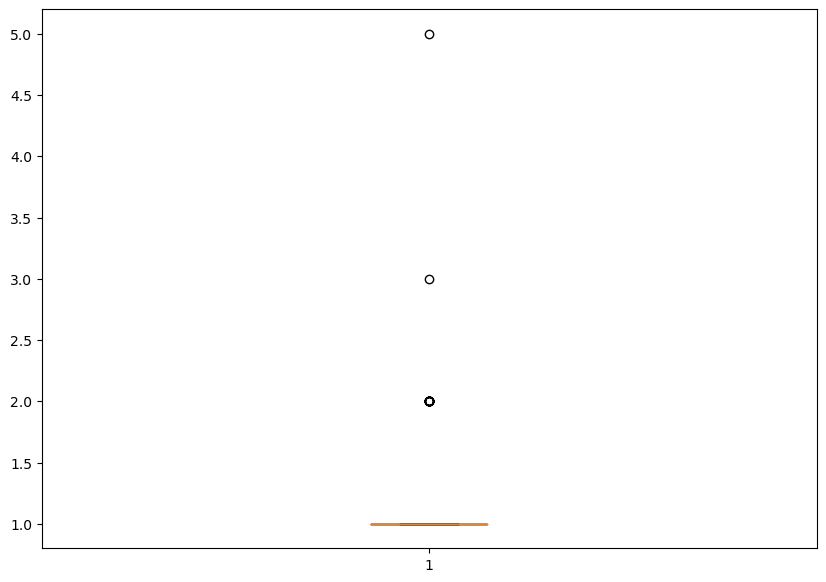

In [5]:
import matplotlib.pyplot as plt

data = final_comments_df['c_like_count'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()


In [6]:
# number of comments per product 
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Strong Girl Nam-soon,200


In [7]:
# product 0 is generated due to how I handled videos with comments disabled
# remove comments according to like threshold
# this is done to make sure the comment are relevent 
like_threshold=1
final_comments_df=final_comments_df[final_comments_df['c_like_count'] >= like_threshold]
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgxWJ86QFbnxB-Oz0EF4AaABAg,NaN,baPBapBaM,2021-12-24T10:09:35Z,2021-12-24T10:09:35Z,67514,he actually admitted that he fell for her but ...
1,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,Ugyk65Vr1FOCmveq6oB4AaABAg,NaN,sAkUrA6309,2021-12-20T03:03:14Z,2021-12-20T03:03:59Z,47747,"usually in any drama especially romcom, actors..."
2,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgyswTPxdPEkWuYepK94AaABAg,NaN,paulina9134,2021-12-21T22:40:15Z,2021-12-21T22:40:15Z,35975,She: living a real kdrama moment while acting ...
3,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgxCZ2y-BBBoISQWEvl4AaABAg,NaN,jungnikahoseok,2021-12-22T17:31:08Z,2021-12-22T17:32:45Z,20616,This hits different when you know the fact tha...
4,Strong Girl Nam-soon,Park hyung sik kissed but it was not scripted,qzNIrbZkXCM,KdramaPink,2021-11-14T12:49:29Z,NaN,https://i.ytimg.com/vi/qzNIrbZkXCM/default.jpg,UgzOIIA-v4FwrlcFBnt4AaABAg,NaN,raraminaj1251,2022-04-30T13:05:56Z,2022-04-30T13:05:56Z,19679,He fell for her she rejected him and when he w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Strong Girl Nam-soon,behind the scenes of strong woman do bong soon...,3CW87x2bji0,thatkdramaholic,2022-02-17T16:05:16Z,NaN,https://i.ytimg.com/vi/3CW87x2bji0/default.jpg,Ugz9g_hacswZHJeRpyl4AaABAg,NaN,ThatsMeRajvi...,2023-01-06T14:04:44Z,2023-01-06T14:04:44Z,20,Ok now i got the vibe why he is V's friend
196,Strong Girl Nam-soon,Girl Attitude Status 🔥 Ft.Little Mix - Power ✨...,qohGpbw5t2E,aspro editz,2023-10-14T00:30:33Z,shorts.,https://i.ytimg.com/vi/qohGpbw5t2E/default.jpg,Ugz-mMm9y6q6ZzCJ7ll4AaABAg,NaN,Shyshy_9411,2024-01-18T17:39:51Z,2024-01-18T17:39:51Z,19,This girl l show in all of us are dead
197,Strong Girl Nam-soon,Eun-ji transformation 😨 into zombie 🧟‍♀ All of...,WoXt1vxnE1k,its Blue Drama 💙,2023-06-28T11:23:30Z,Eun-ji transformation into zombie ‍♀ All of us...,https://i.ytimg.com/vi/WoXt1vxnE1k/default.jpg,UgwhsqAUaU2PbLZI8X94AaABAg,NaN,user-lo1bp7pe1i,2023-07-03T05:37:28Z,2023-07-03T05:37:28Z,19,Name the film:All of us are dead is very cool
198,Strong Girl Nam-soon,SHE SAVED HER LIFE ❤️ #Shorts,aNV59aHbM0o,Goubtube,2021-07-19T19:00:00Z,SUBSCRIBE FOR MORE! --------------------------...,https://i.ytimg.com/vi/aNV59aHbM0o/default.jpg,UgwJysTTGDp5bLzMrSF4AaABAg,NaN,jeremylanier4743,2023-10-23T10:44:57Z,2023-10-23T10:44:57Z,19,What I see is this is what men look like when ...


In [8]:
# number of comments remaining per product after filtering
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Strong Girl Nam-soon,200


In [9]:
final_comments_df.groupby('v_title').size().reset_index(name='counts')


,v_title,counts
0,Eun-ji transformation 😨 into zombie 🧟‍♀ All of...,15
1,Girl Attitude Status 🔥 Ft.Little Mix - Power ✨...,19
2,"He can’t sleep, needs cold shower🤣❤️🦋#onlyforl...",16
3,Her child died but when she became monster she...,25
4,Namra can&#39;t control her hunger 🥺 but she s...,20
5,Park hyung sik kissed but it was not scripted,32
6,SHE SAVED HER LIFE ❤️ #Shorts,24
7,They first meet😢#stronggirlnamsoon #leeyoomi ...,14
8,Vincenzo Court Entry 🔥 Boy &amp; Girl Attitude...,17
9,behind the scenes of strong woman do bong soon...,18


In [10]:
# get sentiment
def analyze_sentiment(comment):
    try:
        analysis = TextBlob(comment)
        return analysis.sentiment.polarity
    except:
        return 0.0
# Textblob sentiment analysis used due to the size of the dataset
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)
final_comments_df[['v_title','c_text','c_author','c_blob_sentiment']].sort_values('c_blob_sentiment')

,v_title,c_text,c_author,c_blob_sentiment
60,Girl Attitude Status 🔥 Ft.Little Mix - Power ✨...,nothing impossible in K-drama,aroundtheworld2082,-0.666667
199,"He can’t sleep, needs cold shower🤣❤️🦋#onlyforl...",The chimesty between them is just crazy,user-od9eg4ys2n,-0.600000
57,Eun-ji transformation 😨 into zombie 🧟‍♀ All of...,I got angry because the series ended and she d...,MattheusSantos-sf3zb,-0.500000
69,"He can’t sleep, needs cold shower🤣❤️🦋#onlyforl...",That ain't cold shower he needs to take care o...,ashley_1898,-0.393750
65,Namra can&#39;t control her hunger 🥺 but she s...,"After watching ""all of us are dead"", ""Revenge...",_.AgustD._.,-0.350000
...,...,...,...,...
142,They first meet😢#stronggirlnamsoon #leeyoomi ...,I love this heroine alot\nThe best actress,ironheartik,0.750000
42,Vincenzo Court Entry 🔥 Boy &amp; Girl Attitude...,Their entrance was great,anakaterina6743,0.800000
17,Girl Attitude Status 🔥 Ft.Little Mix - Power ✨...,Happy 1th anniversary asproeditz,anamariavarga6368,0.800000
191,Her child died but when she became monster she...,The greatest warriors in this world are mothers.,mayureshwar4497,1.000000


Im not sure if even mapping is the correct choice but ill go with this for now

In [11]:
def map_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "neutral"
    
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)
final_comments_df[['v_videoId','c_text','c_blob_sentiment','c_sentiment']].sort_values('c_sentiment')
final_comments_df["c_sentiment"].value_counts()

c_sentiment
positive    127
neutral      45
negative     28
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X = final_comments_df['c_text'] 
y = final_comments_df['c_sentiment'] 
# create a 20% test 80% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# product specific stopwords
product_tokens=np.concatenate([word_tokenize(product.lower()) for product in final_comments_df['product'].unique()])
# remove digits and any single character
product_tokens = [token for token in product_tokens if len(token) > 1 and not token.isdigit()]
product_tokens += ['drama', 'film', 'cinema', 'actor', 'actress', 'director', 'plot',
                         'scene', 'genre', 'subtitles', 'k-drama', 'kdrama', 'k-movie', 'television',
                         'episode', 'screenplay', 'script', 'cinematography', 'soundtrack',
                         'OST', 'character', 'plot twist', 'review', 'ratings', 'premiere',
                         'streaming', 'watchlist', 'subbed', 'dubbed', 'sequel', 'game', 'song',
                         'season', 'trailer', 'casting', 'fanbase', 'recommendation', 'goblin',
                         'viewer', 'critic', 'Korean', 'entertainment', 'watched', 'guardian',
                         'show', 'squid', 'watch', 'watching', 'acting', 'netflix', 'show',
                         'jojo', 'kim', 'hye', 'sun', 'yeong', 'end', 'start', 'like', 'oh', 'someone',
                         'people', 'girl', 'boy', 'man', 'women', 'woman', 'love', 'alarm', 'ring',
                         'application', 'technology', 'romance', 'relationship', 'friendship',
                         'emotion', 'heart', 'dating', 'app','feelings', 'confession', 'secret',
                         'school', 'ringing', 'notification','person','sunoh','year','feel','guy',
                         'sunho','everyone','hate','ending','know','end',
                         'heartache', 'crush','friend', 'friendship', 'romantic', 'triangle']

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


X = final_comments_df['c_text']
y = final_comments_df['c_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Processing
def preprocess_text(text):
    tokens = word_tokenize(text)
    # stopwords punctuation etc
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.SnowballStemmer('english')
    # stemmer = PorterStemmer()
    # split into tokens
    tokens = word_tokenize(text)
    # removes stopwords and numbers and stems from tokens makes sure its all lowercase too
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token.lower() not in stop_words and token.lower() not in product_tokens]
    return ' '.join(tokens)


In [15]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
    ('preprocess', 
    TfidfVectorizer(preprocessor=preprocess_text,
                    norm='l2',
                    encoding='utf-8',
                    lowercase=True,
                    ngram_range=(1, 1),
                    max_df=0.8,
                    min_df=10,
                    binary=True,
                    max_features=500,
                    sublinear_tf=True)
    # CountVectorizer(preprocessor=preprocess_text,ngram_range=(1, 1))
     ), 
    ('classifier', LogisticRegression())
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.00      0.00      0.00         7
    positive       0.62      1.00      0.77        25

    accuracy                           0.62        40
   macro avg       0.21      0.33      0.26        40
weighted avg       0.39      0.62      0.48        40



/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


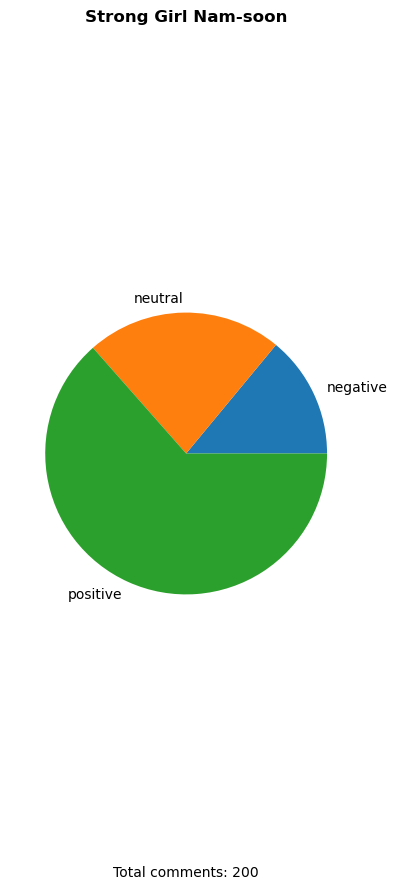

In [16]:
import matplotlib.pyplot as plt

products = sorted(final_comments_df['product'].unique())
sentiments = sorted(final_comments_df['c_sentiment'].unique())
count = 0

plt.figure(figsize=(10, 11))

for product in products:
    labels = sentiments

    val_counts = sorted(final_comments_df[final_comments_df['product'] == product]['c_sentiment'].value_counts())
    sizes = [val_count / sum(val_counts) for val_count in val_counts]

    plt.subplot(len(products)//2 + 1, 2, count % 6 + 1)
    plt.axis('equal')
    plt.title(product, fontweight='bold')

    plt.pie(sizes, labels=labels)
    bottom_text = f"Total comments: {len(final_comments_df[final_comments_df['product'] == product])}"
    plt.text(0.5, 0.0, bottom_text, size=10, ha="center", transform=plt.gca().transAxes)
    count += 1

plt.show()
# We can infer what the majority of people think about the product
# since these laptops are selected from the top 5 best laptops according to lapmag
# the sentiment is likely to be positive as it is here

In [17]:
!pip3 install wordcloud

/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


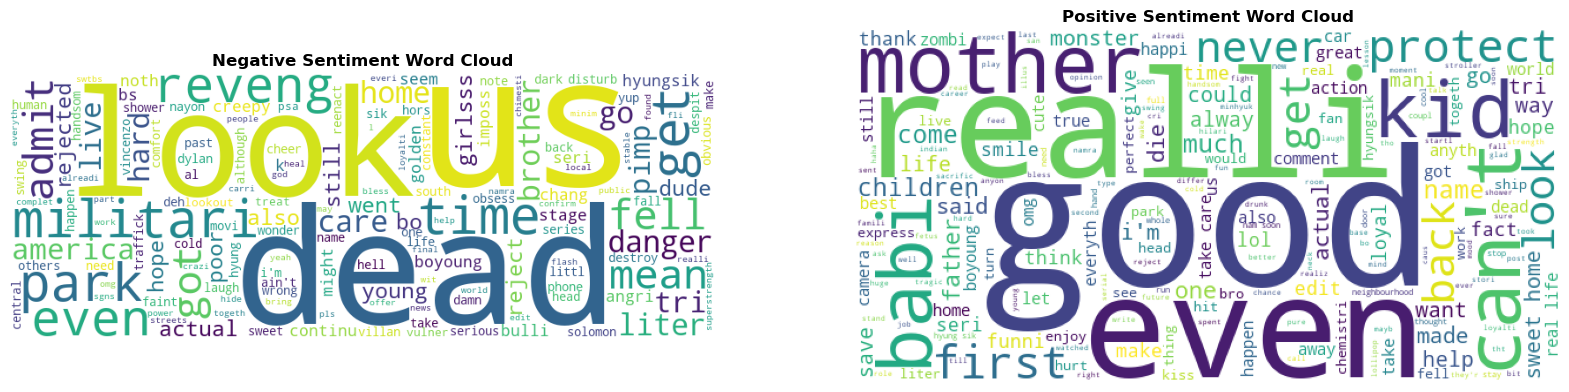

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = final_comments_df[final_comments_df['c_sentiment'] == 'positive']['c_text']
negative_comments = final_comments_df[final_comments_df['c_sentiment'] == 'negative']['c_text']

stop_words = set(stopwords.words('english')).union(product_tokens)
# apply stemming to stop words
stemmer = nltk.stem.SnowballStemmer('english')
stop_words_stemmed = set([stemmer.stem(word) for word in stop_words])

positive_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in positive_comments]

negative_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in negative_comments]

wordcloud_positive = WordCloud(width=600, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(positive_comments_stemmed))
wordcloud_negative = WordCloud(width=800, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(negative_comments_stemmed))



plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Negative Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_negative)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Positive Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_positive)
plt.axis('off')

plt.show()
# shows words present in positive and negative sentiment text 

In [19]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# text_clf = Pipeline([
#     ('vectorizer', TfidfVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# parameters = {
#     'vectorizer': [TfidfVectorizer(),CountVectorizer()],
#     'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'vectorizer__preprocessor':[preprocess_text],
#     'vectorizer__encoding':['utf-8'],
#     # 'vectorizer__max_df': [0.6, 0.9],
#     'vectorizer__min_df': [3],
#     # 'vectorizer__max_features': [1,2,3],
#     # 'vectorizer__norm': ['l1', 'l2'],
#     # 'vectorizer__smooth_idf': [False,True],
#     'vectorizer__binary':[False,True],
#     'vectorizer__lowercase':[False,True],
#     # 'vectorizer__sublinear_tf': [True, False],
#     # 'vectorizer__use_idf': [True, False],
#     'classifier': [
#                     MultinomialNB(),
#                     SVC(),
#                     LogisticRegression(),
#                     RandomForestClassifier()
#                    ],
# }

# grid_search = GridSearchCV(text_clf, parameters, cv=2, n_jobs=1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(classification_report(y_test, y_pred))